# Mixing times

Here we apply the channel $\mathcal F$ for various values of $\lambda$ and for open boundary conditions. $\lambda$ mixes us between our original $\mathcal E$ channel and its CZ conjugated version. 
The difference between $\mathcal F$ and $\mathcal E$ is that $\mathcal F$ is a random architecture. That is, at each time step, we randomly choose a qubit, and then apply $\mathcal E_j$ on it.
We expect to see that the mixing time scales like the number of qubits squared (i.e. random walk).

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [13, 8]

We ran all the simulations and stored the data with the `data_io.py` file. In this notebook, we load in this data and then plot various things with it.

In [23]:
lams = [0.0, 0.05, 0.1, 0.5, 0.8, 1.0]

num_qubits = set()
string_data, trivial_string_data = {}, {}
for lam in lams:
    with open(f"data/lam_eq_{int(100*lam)}.dat") as f:
        start, triv, nqubits = False, False, 0
        for l in f:
            if "#" in l:
                start = True
            elif l and start:
                if "trivial string order" in l:
                    triv = True
                    i = l.index("qubits") + 6
                    nqubits = int(l[i:].strip())
                    num_qubits.add(nqubits)
                elif "string order" in l:
                    triv = False
                    i = l.index("qubits") + 6
                    nqubits = int(l[i:].strip())
                    num_qubits.add(nqubits)
                elif triv:
                    trivial_string_data[(lam, nqubits)] = eval(l)
                else:
                    string_data[(lam, nqubits)] = eval(l)

num_qubits = list(sorted(num_qubits))

Plot the data for each different $\lambda$.

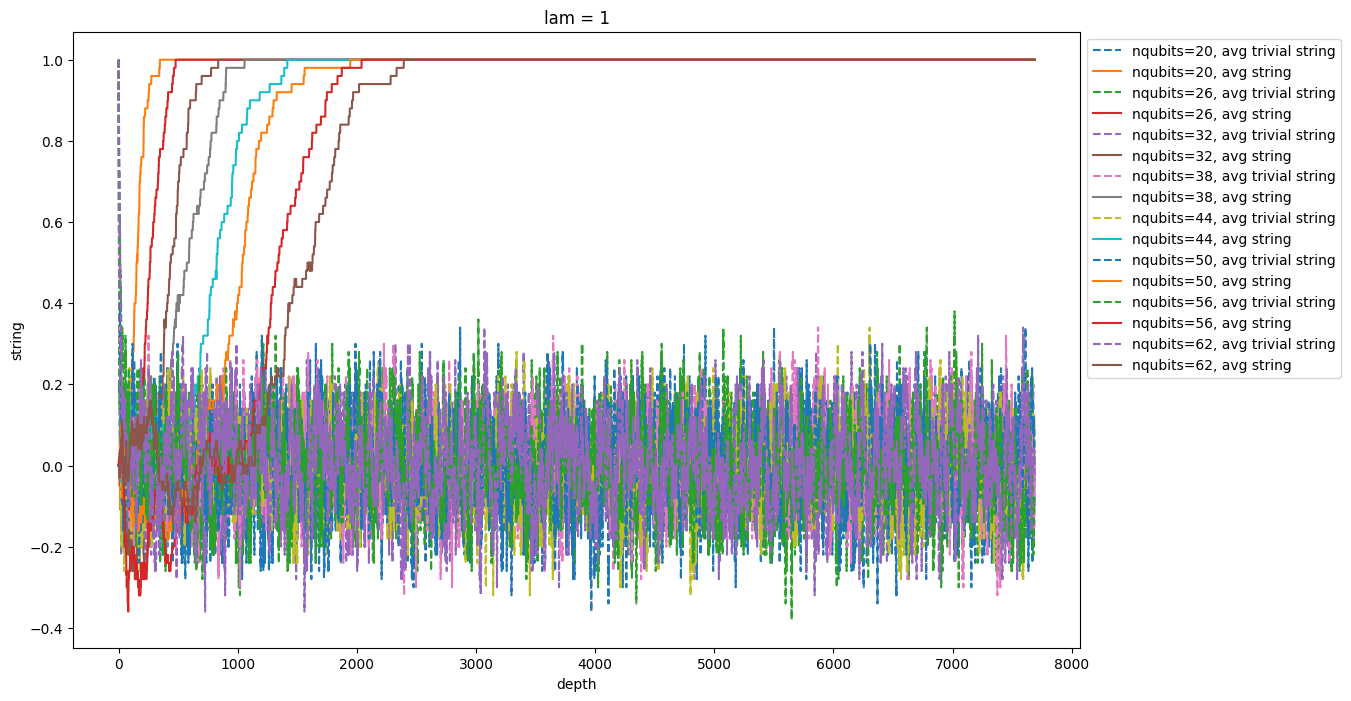

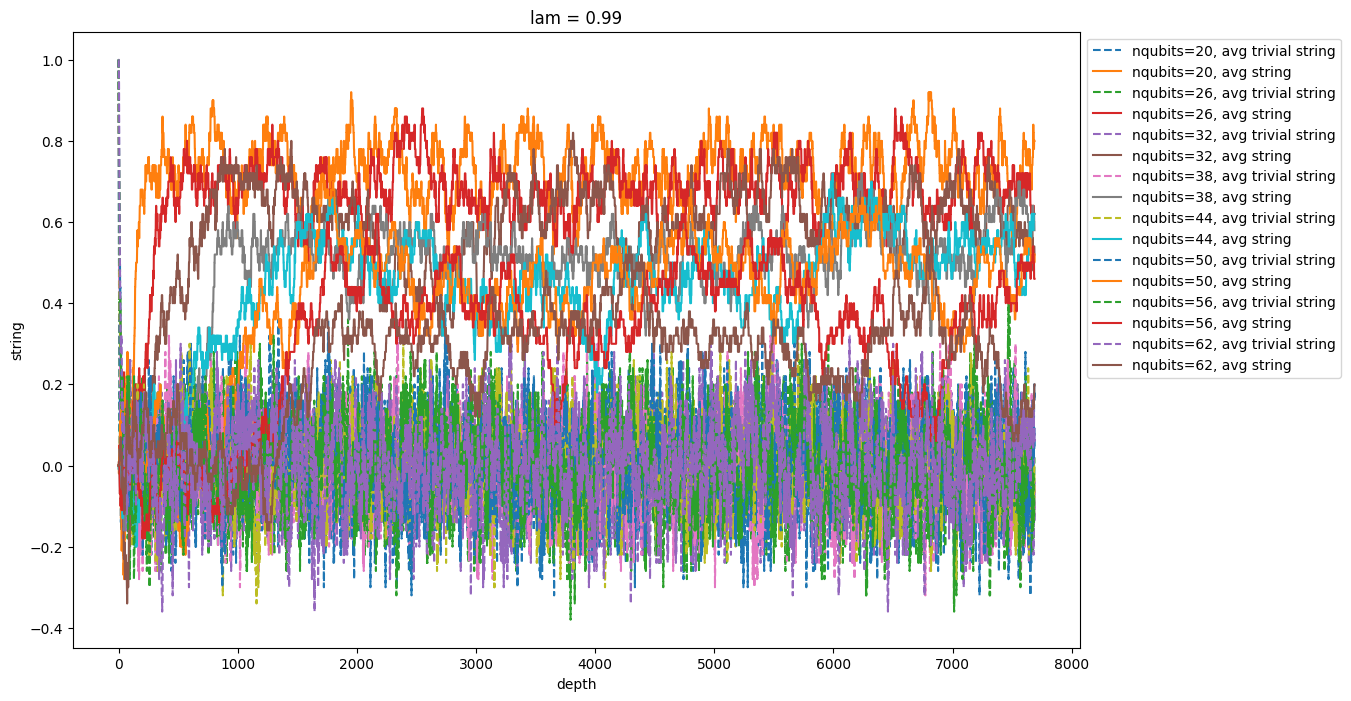

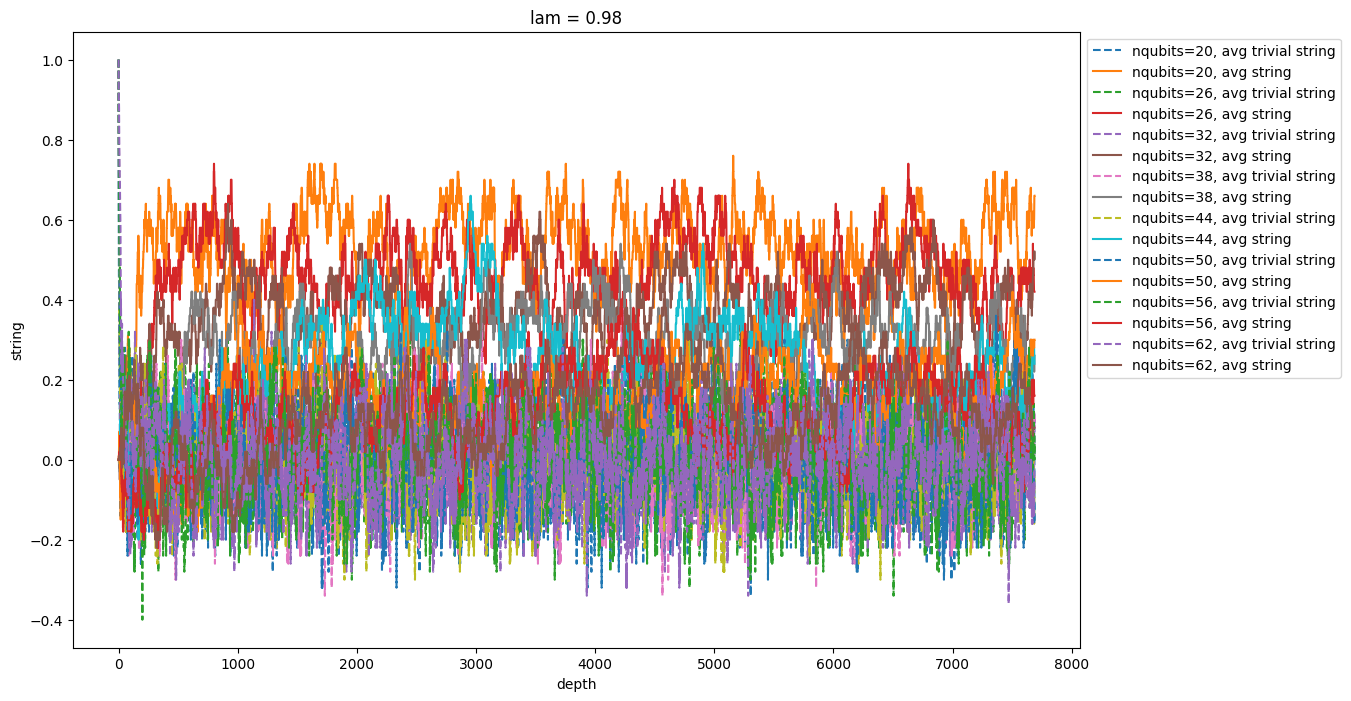

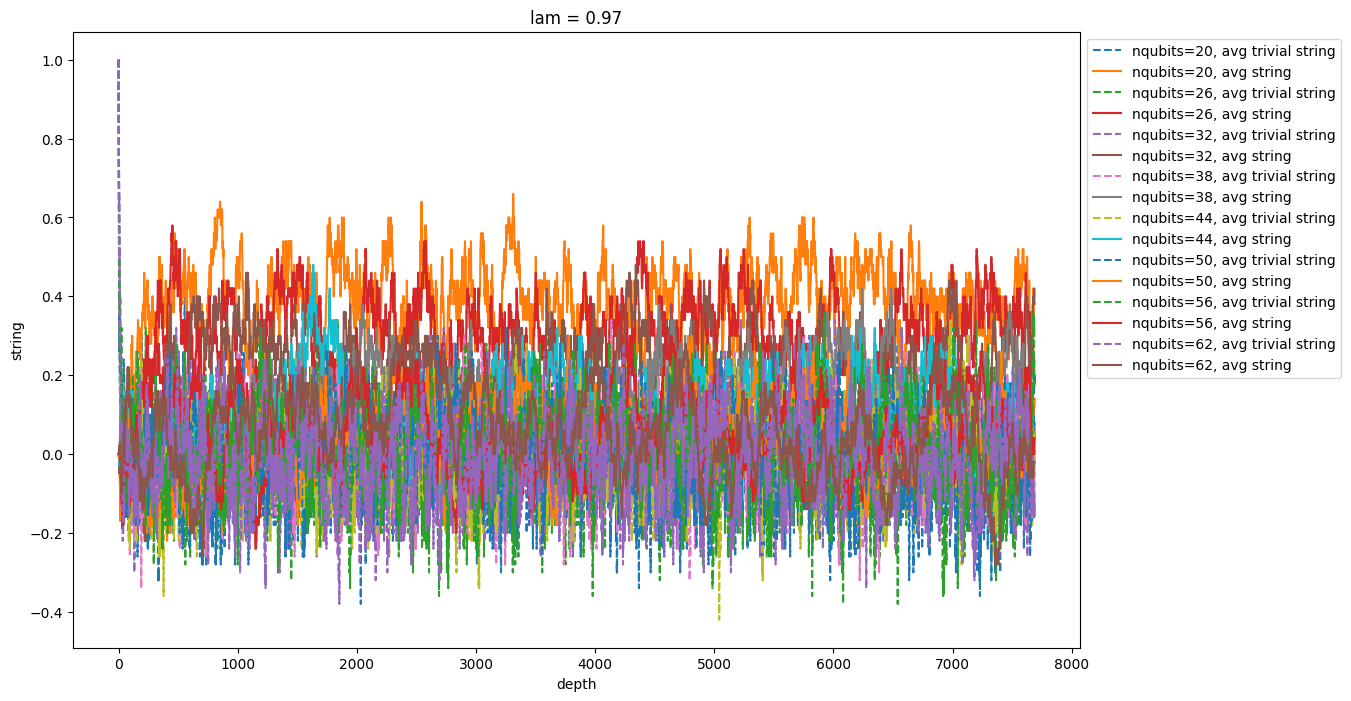

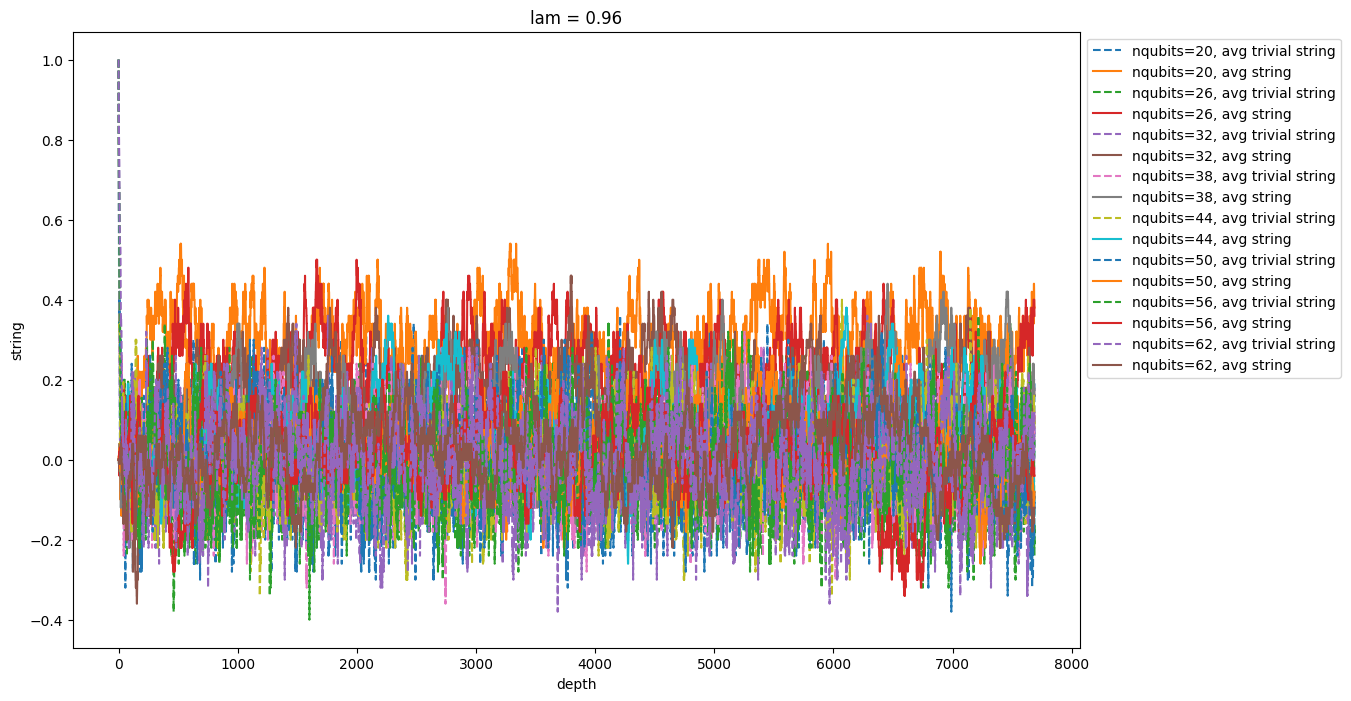

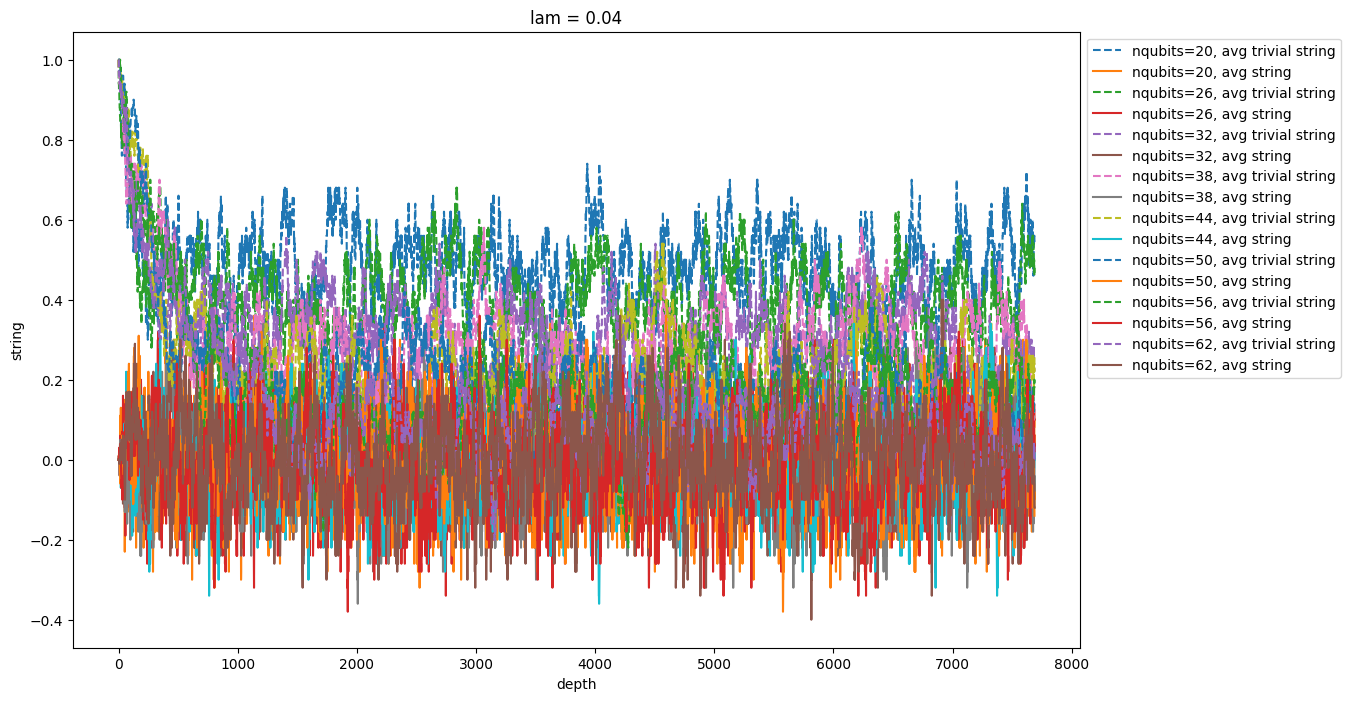

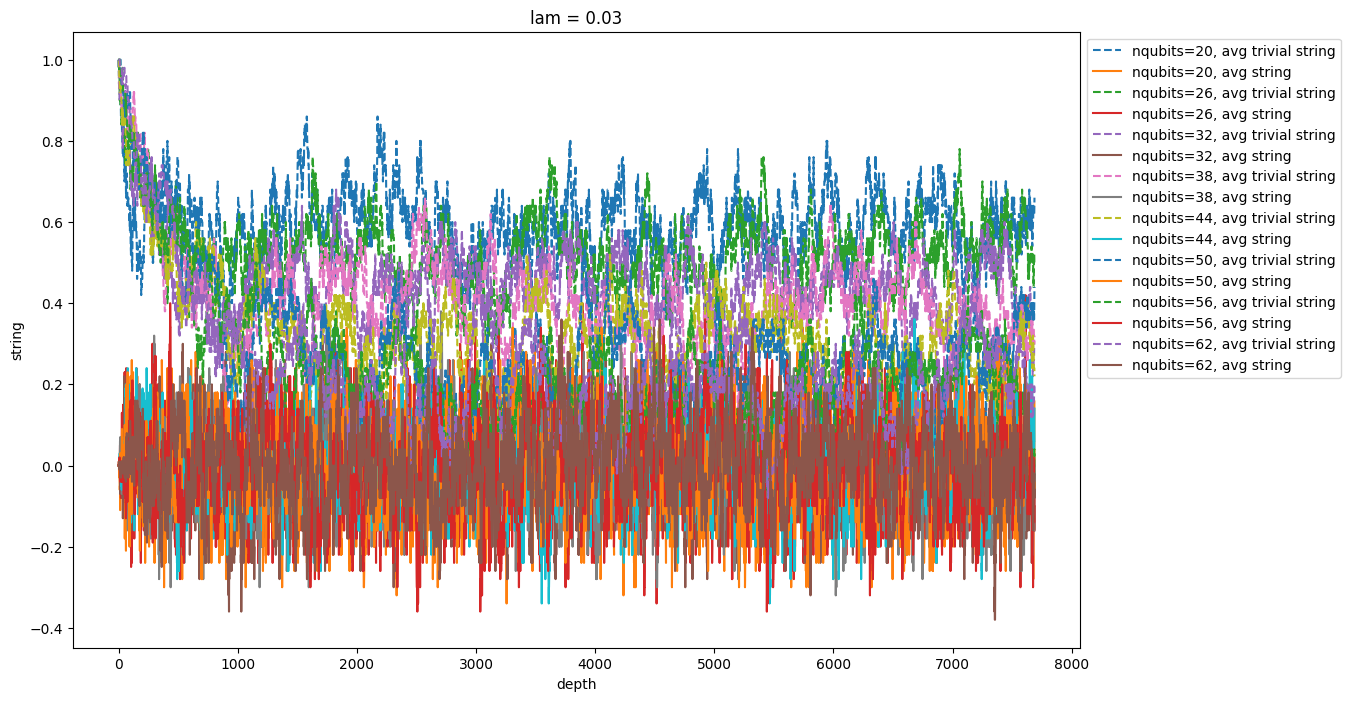

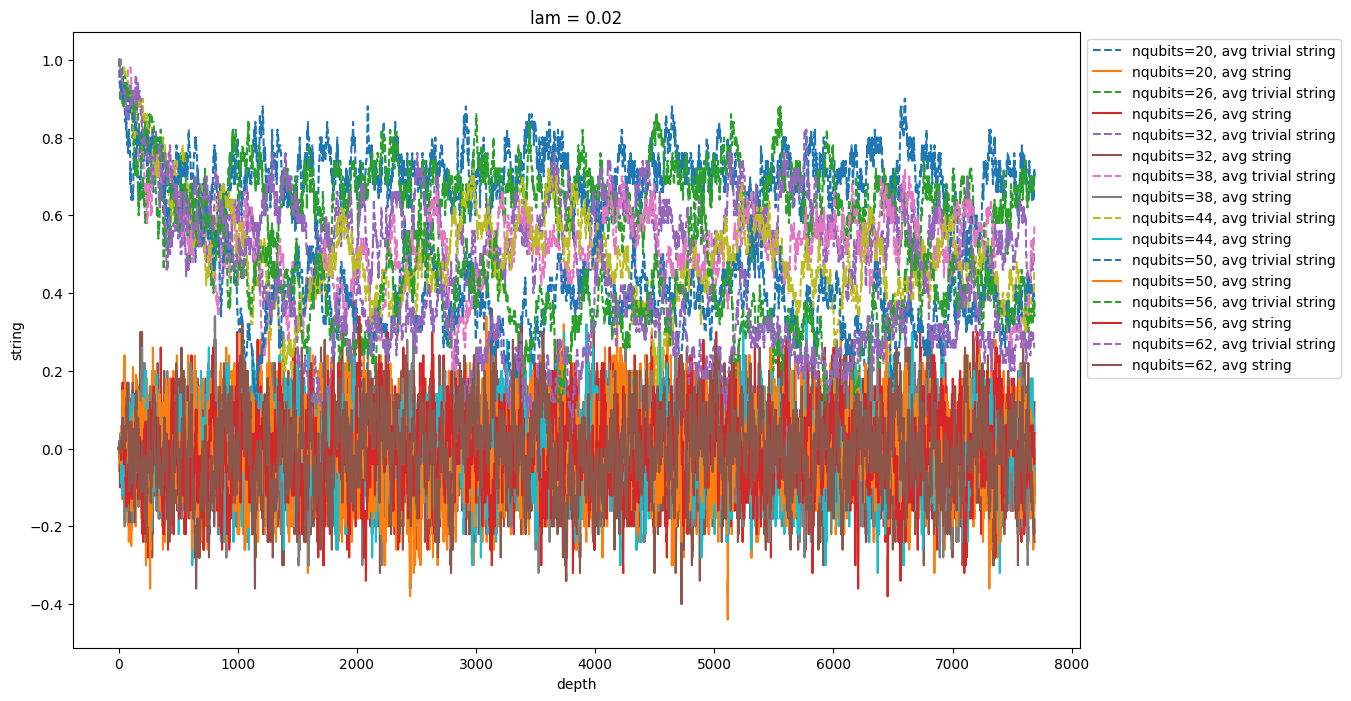

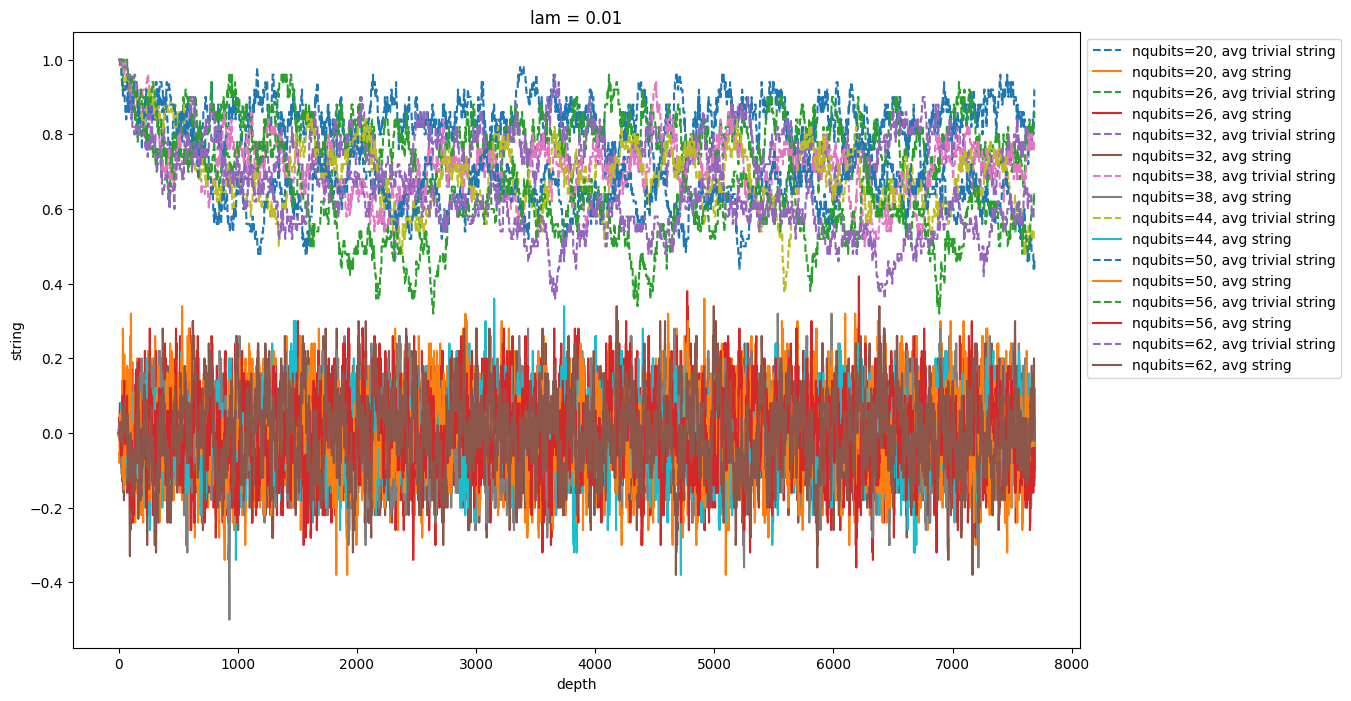

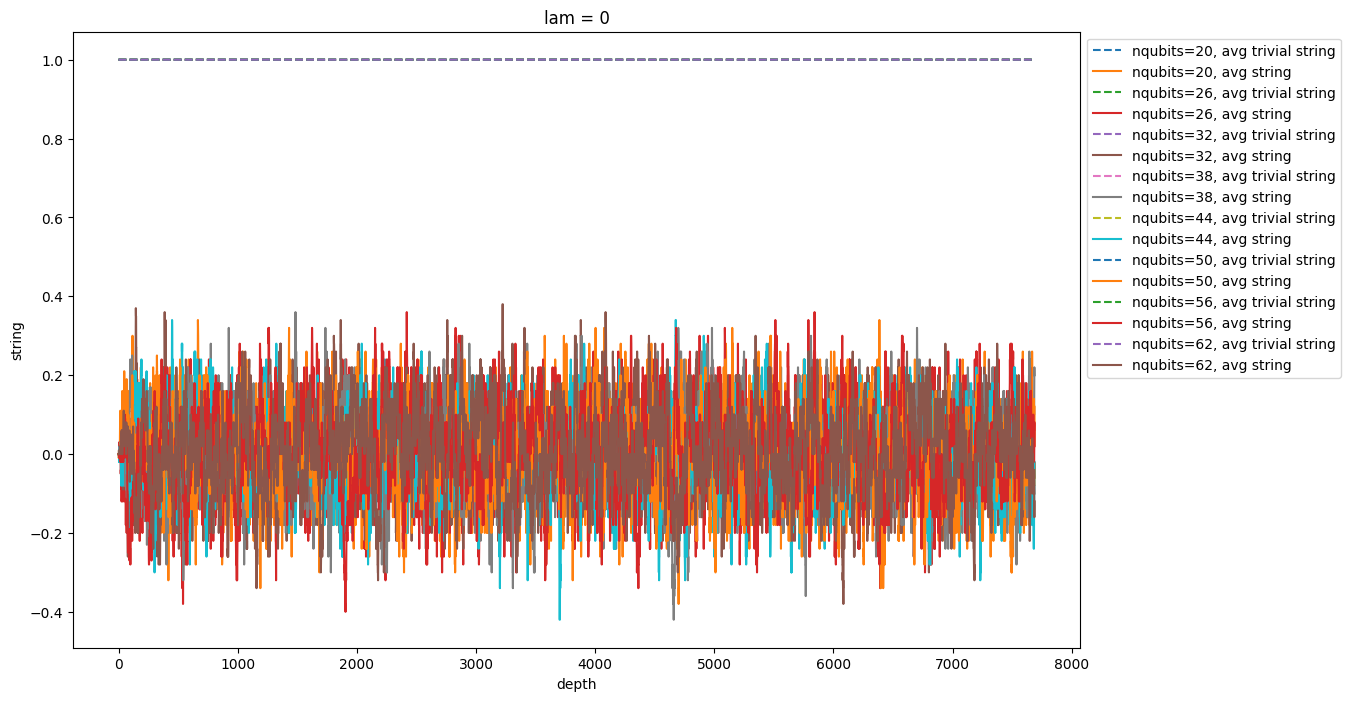

In [24]:
for lam in lams:
    plt.figure()
    for nqubits in num_qubits:
        plt.plot(
            range(len(trivial_string_data[(lam, nqubits)])),
            trivial_string_data[(lam, nqubits)],
            "--",
            label=f"nqubits={nqubits}, avg trivial string",
        )
        plt.plot(
            range(len(string_data[(lam, nqubits)])),
            string_data[(lam, nqubits)],
            "-",
            label=f"nqubits={nqubits}, avg string",
        )
        # plt.axvline(nqubits**2, linestyle=":", color="k")
    plt.legend(bbox_to_anchor=(1, 1))
    plt.xlabel("depth")
    plt.ylabel("string")
    plt.title(f"lam = {lam}")

plt.show()

Plot the data for each different nqubits.

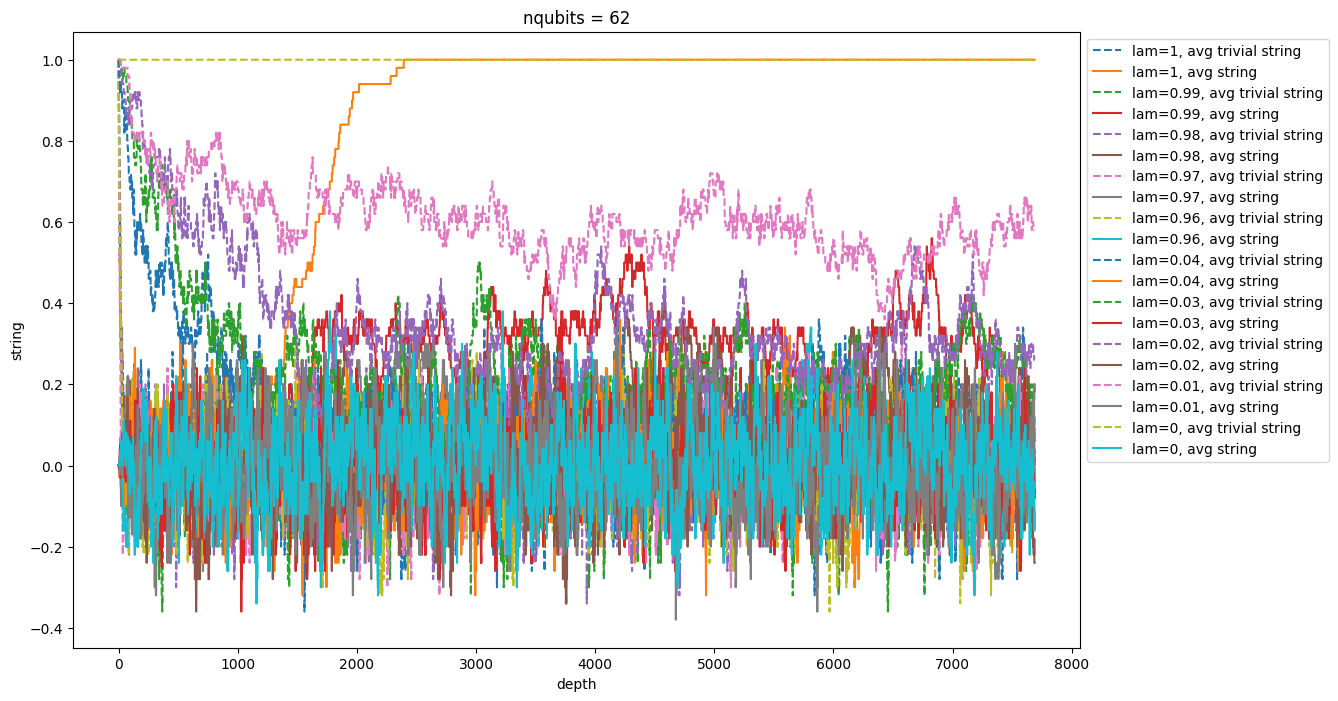

In [28]:
nqubits = max(num_qubits)
plt.figure()
for lam in lams:
    plt.plot(
        range(len(trivial_string_data[(lam, nqubits)])),
        trivial_string_data[(lam, nqubits)],
        "--",
        label=f"lam={lam}, avg trivial string",
    )
    plt.plot(
        range(len(string_data[(lam, nqubits)])),
        string_data[(lam, nqubits)],
        "-",
        label=f"lam={lam}, avg string",
    )
plt.legend(bbox_to_anchor=(1, 1))
# plt.axvline(nqubits**2, linestyle=":", color="k")
plt.xlabel("depth")
plt.ylabel("string")
plt.title(f"nqubits = {nqubits}")

plt.show()

## Mixing time

Let's figure out at what depth each curve achieves a value of 0.95. We call that the mixing time. We then plot the mixing time as a function of the number of qubits for each $\lambda$.

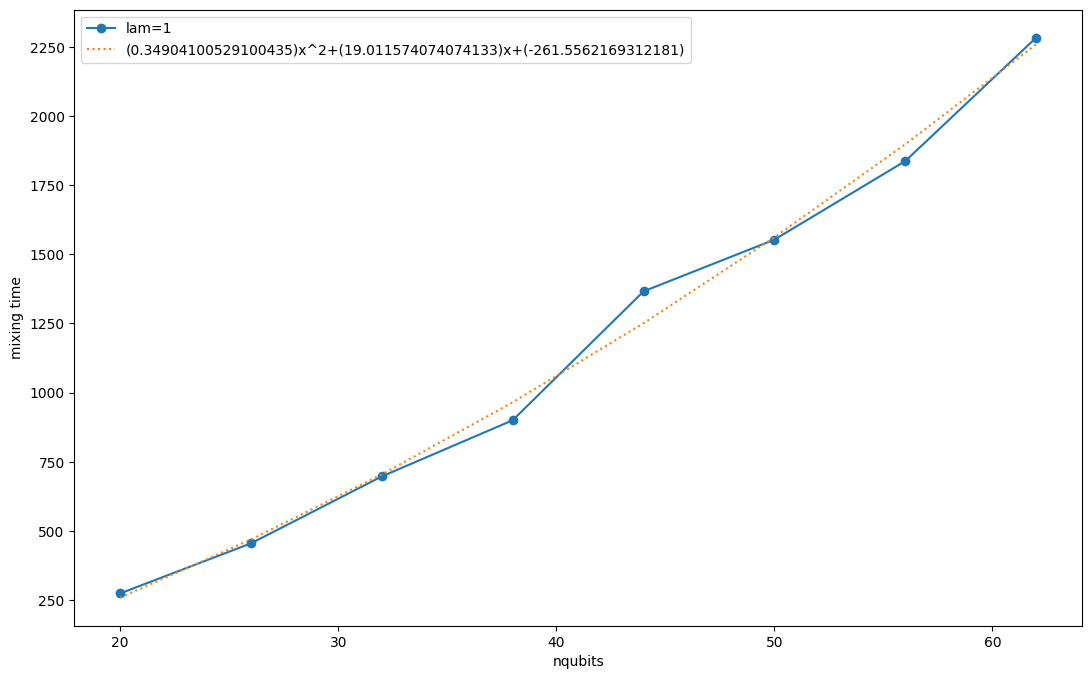

In [32]:
threshold = 0.95
plt.figure()
for lam in lams:
    xs, mixing_time = [], []
    for nqubits in num_qubits:
        dat = string_data[(lam, nqubits)]
        for mt in range(len(dat) - 1, -1, -1):
            if dat[mt] <= threshold:
                break
        if dat[-1] >= threshold:
            xs.append(nqubits)
            mixing_time.append(mt)

    if xs:
        plt.plot(xs, mixing_time, "o-", label=f"lam={lam}")
        a, b, c = np.polyfit(xs, mixing_time, 2)
        plt.plot(
            xs,
            np.poly1d(np.polyfit(xs, mixing_time, 2))(xs),
            ":",
            label=f"({a})x^2+({b})x+({c})",
        )


plt.xlabel("nqubits")
plt.ylabel("mixing time")
plt.legend()
plt.show()

## Decay with $\lambda$

Plot the long time average of the string order parameter as a function of $\lambda$.

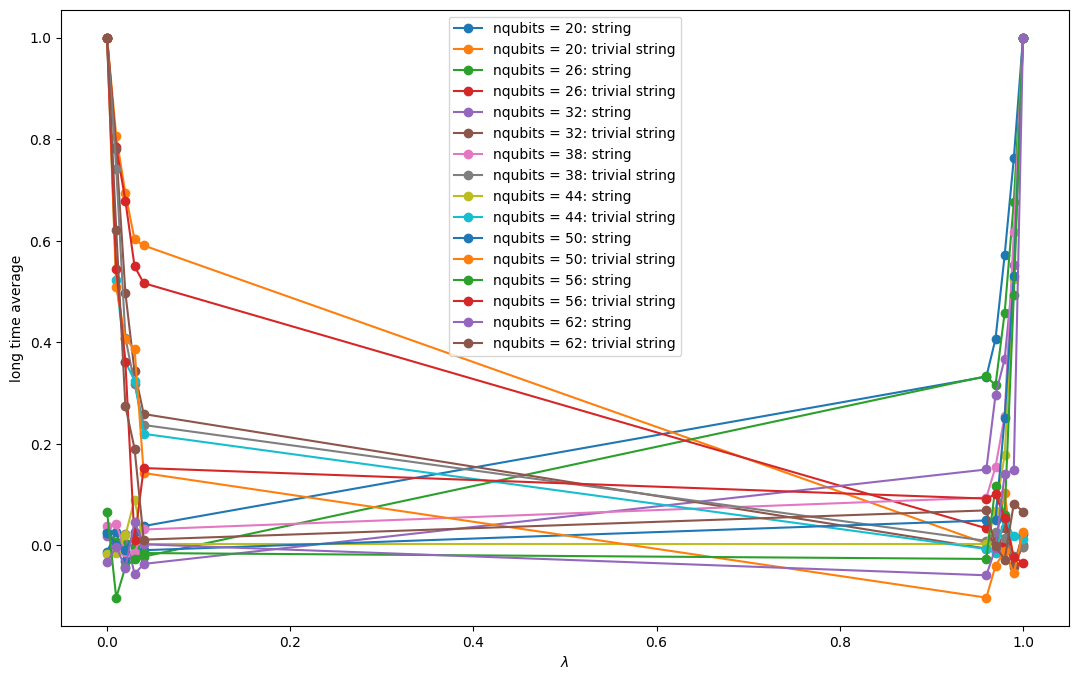

In [27]:
plt.figure()

for nqubits in num_qubits:
    ys = [np.mean(string_data[(lam, nqubits)][-100:]) for lam in lams]
    plt.plot(lams, ys, "o-", label=f"nqubits = {nqubits}: string")

    ys = [np.mean(trivial_string_data[(lam, nqubits)][-100:]) for lam in lams]
    plt.plot(lams, ys, "o-", label=f"nqubits = {nqubits}: trivial string")

plt.xlabel(r"$\lambda$")
plt.ylabel("long time average")
plt.legend()
plt.show()